<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase14_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 14 (Miércoles 21 de mayo, 2025)
---

## Posibles proyectos

### 1. Why do so many matrices have low effective rank?

[Video a charla de Alex Townsend](https://ocw.mit.edu/courses/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/resources/lecture-17-rapidly-decreasing-singular-values/)

Professor Alex Townsend’s lecture
Why do so many matrices have low effective rank?
Sylvester test for rapid decay of singular values
Image compression: Rank
 needs only
 numbers.
Flags give many examples / diagonal lines give high rank.

## 2. Fisher’s Linear Discriminant Analysis (LDA)

## 📌 Resumen

Fisher’s LDA es una técnica clásica de estadística y aprendizaje automático que busca **separar dos poblaciones** basándose en características multivariadas (como edad, altura, peso).

### Objetivo

Encontrar una **dirección** $v$ tal que la proyección escalar $v^T f$ de cada muestra $f$ maximice la separación entre ambas poblaciones.

### Supuestos

- Cada muestra está representada por un **vector de características** $f \in \mathbb{R}^n$.
- Cada población tiene:
  - Media vectorial: $\mathbf{m}_1$, $\mathbf{m}_2$
  - Matriz de covarianza: $\Sigma_1$, $\Sigma_2$

### Criterio de separación

Se busca maximizar el **ratio de separación**:
$$
R = \frac{(v^T(\mathbf{m}_1 - \mathbf{m}_2))^2}{v^T \Sigma_1 v + v^T \Sigma_2 v}
$$

Esto lleva a resolver el problema de autovalores:
- Sea $S = (\mathbf{m}_1 - \mathbf{m}_2)(\mathbf{m}_1 - \mathbf{m}_2)^T$
- Sea $M = \Sigma_1 + \Sigma_2$
- Entonces, el vector óptimo $v$ es un autovector de $M^{-1}S$

---

## 🧪 Simulación en Julia


In [ ]:
using Pkg
Pkg.add("Distributions")
#using Pkg
#Pkg.add("PlotlyJS")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [31c24e10] + Distributions v0.25.120
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
using LinearAlgebra, Random, Distributions, Plots

# Generamos datos para dos poblaciones en 3D
Random.seed!(123)
μ1 = [2.0, 2.0, 2.0]
μ2 = [6.0, 6.0, 6.0]
Σ1 = [1.0 0.2 0.1; 0.2 1.0 0.1; 0.1 0.1 1.0]
Σ2 = [1.0 -0.2 -0.1; -0.2 1.0 -0.1; -0.1 -0.1 1.0]

X1 = rand(MvNormal(μ1, Σ1), 100)
X2 = rand(MvNormal(μ2, Σ2), 100)

# Cálculo de medias y matrices
m1 = mean(X1, dims=2)
m2 = mean(X2, dims=2)
S = (m1 - m2) * transpose(m1 - m2)
M = cov(X1', dims=1) + cov(X2', dims=1)

# LDA: autovector principal de M⁻¹S
w = inv(M) * (m1 - m2)
w /= norm(w)  # normalizamos

# Proyección y visualización
proj1 = w' * X1
proj2 = w' * X2

histogram(proj1[:], alpha=0.5, label="Población 1", bins=20)
histogram!(proj2[:], alpha=0.5, label="Población 2", bins=20)
xlabel!("Proyección sobre v (Fisher)")
ylabel!("Frecuencia")
title!("LDA: Separación de poblaciones")


LoadError: ArgumentError: Package Distributions not found in current path.
- Run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.

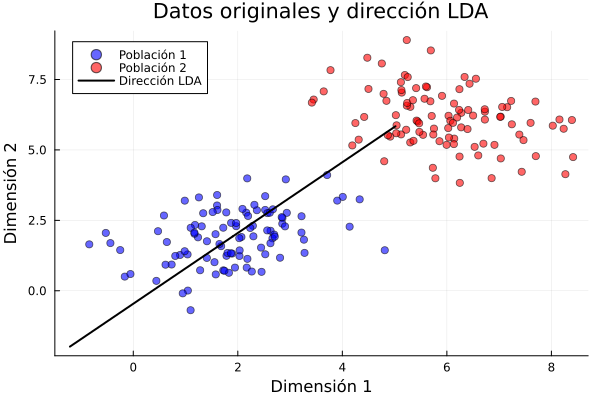

In [ ]:
# Instalar paquetes necesarios (ejecutar solo una vez)
# using Pkg
# Pkg.add(["LinearAlgebra", "Random", "Distributions", "Plots"])

# Código LDA 2D
using LinearAlgebra, Random, Distributions, Plots

# Generamos datos para dos poblaciones en 2D
Random.seed!(123)
μ1 = [2.0, 2.0]  # Media población 1
μ2 = [6.0, 6.0]  # Media población 2
Σ1 = [1.0 0.3; 0.3 1.0]  # Matriz covarianza población 1
Σ2 = [1.0 -0.3; -0.3 1.0]  # Matriz covarianza población 2

# Generamos 100 puntos para cada población
X1 = rand(MvNormal(μ1, Σ1), 100)
X2 = rand(MvNormal(μ2, Σ2), 100)

# Cálculo de medias y matrices para LDA
m1 = mean(X1, dims=2)
m2 = mean(X2, dims=2)
S = (m1 - m2) * transpose(m1 - m2)
M = cov(X1', dims=1) + cov(X2', dims=1)

# Calculamos la dirección de Fisher (LDA)
w = inv(M) * (m1 - m2)
w /= norm(w)  # Normalizamos el vector

# Proyección de los datos
proj1 = w' * X1
proj2 = w' * X2

# Creamos una figura con dos subplots
p1 = scatter(X1[1,:], X1[2,:], label="Población 1", color=:blue, alpha=0.6,
            title="Datos originales y dirección LDA", xlabel="Dimensión 1", ylabel="Dimensión 2")
scatter!(p1, X2[1,:], X2[2,:], label="Población 2", color=:red, alpha=0.6)
plot!(p1, [m1[1], m1[1]+5*w[1]], [m1[2], m1[2]+5*w[2]],
      label="Dirección LDA", color=:black, linewidth=2)
plot!(p1, [m1[1], m1[1]-5*w[1]], [m1[2], m1[2]-5*w[2]],
      color=:black, linewidth=2, label=false)

# Mostramos ambos graáficos juntos
# plot(p1, p2, layout=(1,2), size=(1000,400))

---


# Normas de Vectores y Funciones

Una **norma** mide el “tamaño” o “longitud” de un vector. Debe cumplir dos propiedades clave:

1. **Escalamiento:** $\|c v\| = |c| \cdot \|v\|$
2. **Desigualdad triangular:** $\|v + w\| \leq \|v\| + \|w\|$

---

## Normas más importantes

Para un vector $v = (v_1, v_2, \dots, v_n) \in \mathbb{R}^n$, las normas más comunes son:

- Norma $\ell^1$: $\|v\|_1 = \sum_{i=1}^n |v_i|$
- Norma $\ell^2$: $\|v\|_2 = \left( \sum_{i=1}^n v_i^2 \right)^{1/2}$
- Norma $\ell^\infty$: $\|v\|_\infty = \max_{1 \leq i \leq n} |v_i|$



**Ejercicio:** Qué lugar geométrico da $\|v\|=1$ para las distinas normas?

---




##  Problema de optimización

Queremos minimizar $\|v\|_p$ sujeto a la restricción lineal:

> $a_1 v_1 + a_2 v_2 = 1$

Esto es, cuáles de los puntos de la recta dista menos del origen según las distintas normas?

Dependiendo de la norma $\|\cdot\|_p$, obtendremos diferentes soluciones.

**Ejercicio:** Considerar una recta al azar, y obsevar dónde se alcanza la mínima distancia pra las distintas normas.



---

##  Observación clave

La solución que minimiza $\|v\|_1$ es **esparsa**: tiene muchos ceros.  
Esto se debe a que el diamante $\ell^1$ toca la recta en un vértice.

> Las soluciones con norma $\ell^1$ tienden a tener **pocas componentes no nulas**.  
> Son ideales para encontrar representaciones *sparse* o ralas.

---



##  Conexión con la norma $\ell^0$

- La **norma $\ell^0$** cuenta el número de componentes no nulas de $v$ (aunque **no es una norma válida** dado que no verifica la condición $\|cv||=|c|\cdot\|v\|$).
- La **norma $\ell^1$** es la "convexificación" de $\ell^0$.
- Usar $\ell^1$ permite hallar soluciones dispersas a problemas del tipo $Av = b$.
- Esto es fundamental en técnicas como **basis pursuit** y **LASSO**.

---

## Conclusión

- Las normas $\ell^1$, $\ell^2$, $\ell^\infty$ generan diferentes tipos de soluciones al problema de mínima distancia.
- Sólo $\ell^1$ produce soluciones **sparse**, con muchas componentes en cero.
- La norma $\ell^1$ es clave en problemas donde se busca parsimonia?, interpretabilidad o compresión.



##  Basis Pursuit y LASSO

###  Objetivo
Ambos métodos buscan encontrar **soluciones dispersas** (sparse) al sistema lineal $A v = b$, es decir, vectores $v$ con muchas componentes en cero.

---

###  Basis Pursuit (BP)

Resuelve:
$$
\min \|v\|_1 \quad \text{sujeto a } A v = b
$$

- Promueve la **dispersión** al minimizar la norma $\ell^1$.
- No permite error: exige que $A v = b$ exactamente.
- Muy útil en compresión de señales y representación dispersa.

---

###  LASSO (Least Absolute Shrinkage and Selection Operator)

Resuelve:
$$
\min_v \left\{ \frac{1}{2} \|A v - b\|_2^2 + \lambda \|v\|_1 \right\}
$$

- Compromiso entre **ajuste** (primer término) y **dispersión** (segundo término).
- $\lambda > 0$ controla cuán esparsa será la solución.
- Popular en **regresión estadística**, selección de variables y aprendizaje automático.

---

Ambos métodos reemplazan la minimización de la norma $\ell^0$ (no convexa y difícil de optimizar) por su relajación convexa con $\ell^1$.


## Productos Internos y Normas-$S$

### ¿Sólo $\ell^2$ está relacionada con productos internos?

Las normas $\ell^1$ y $\ell^\infty$ **no** provienen de productos internos.  
Sin embargo, podemos definir **otras normas y productos internos** mediante una matriz simétrica definida positiva $S$.

---

###  Definición: Producto interno $S$ y norma-$S$

Sea $S$ una matriz simétrica definida positiva, entonces:

- **Norma-$S$:**
  $$
  \|v\|_S^2 = v^\top S v
  $$

- **Producto interno $S$:**
  $$
  \langle v, w \rangle_S = v^\top S w
  $$

Esto define una **norma** y un **producto interno** en $\mathbb{R}^n$.

---

###  Propiedades importantes

- La norma-$S$ cumple las mismas propiedades que la norma euclídea.
- Si $S = I$, recuperamos el producto interno y la norma estándar $\ell^2$.
- Si $S = A^\top A$ con $A$ invertible, el producto interno $S$ coincide con el producto euclídeo de $Av$ y $Aw$:
  $$
  \langle v, w \rangle_S = \langle A v, A w \rangle
  $$

---

###  Aplicaciones

- Este marco general permite definir **ángulos**, **ortogonalidad** y **proyecciones** en espacios donde la métrica no es euclídea.
- Muy útil en **análisis numérico**, **métodos de mínimos cuadrados generalizados**, y **análisis de covarianzas**.


---



# Normas en espacios de funciones

Este es un tema central del **análisis funcional**. Un espacio de funciones reúne todas las funciones con cierto nivel de suavidad.

---

###  Ejemplo base: $C[0,1]$

Contiene todas las funciones continuas $f$ en $[0,1]$.  
La norma infinito o uniforme es:

$$
\|f\|_\infty = \max_{z \in [0,1]} |f(z)|
$$

Esta norma es similar a la norma $\ell^\infty$ para vectores (coincide con la norma $\infty$ en $\mathbb{R}^{[0,1]}$.)

---

###  Aumentar suavidad: espacios $C^1[0,1]$ y $C^2[0,1]$

- $C^1[0,1]$: $f$ y $f'$ continuas.
- $C^2[0,1]$: $f$, $f'$, y $f''$ continuas.

Normas asociadas:

$$
\|f\|_{C^1} = \|f\|_\infty + \left\| \frac{df}{dx} \right\|_\infty
\quad , \quad
\|f\|_{C^2} = \|f\|_\infty + \left\| \frac{d^2f}{dx^2} \right\|_\infty
$$

Estos son **espacios de Banach**, pero **no son Hilbert** (no provienen de un producto interno).

---

###  Espacio de Hilbert*  $L^2$

Sobre el espacio de funciones de cuadrado integrable (un poco apurado esto)

$$
\langle f, g \rangle_{L^2} = \int_0^1 f(x) g(x)\,dx
$$
donde la norma $L^2$ queda definida por
$$
\|f\|_{L^2}=\int_0^1 |f(x)|^2\,dx
$$

---



## Norma de Frobenius para Matrices

Una norma matricial $\|A\|$ debe cumplir las reglas básicas de una norma vectorial:

- $\|A\| > 0$ si $A \neq 0$
- $\|cA\| = |c|\|A\|$
- $\|A + B\| \leq \|A\| + \|B\|$


- Regla adicional: si $B$ es una matriz, $\|AB\| \leq \|A\| \cdot \|B\|$ (submultiplicatividad)

---

### Norma de Frobenius

Se define como la **norma euclídea** de la matriz tratada como un vector de entradas:

$$
\|A\|_F^2 = \sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2
$$

Esto equivale a:

$$
\|A\|_F^2 = \|a_1\|^2 + \|a_2\|^2 + \cdots + \|a_n\|^2
$$

donde $a_j$ son las columnas de $A$.

---
La norma de Frobenius proviene de un producto interno:
$$
\langle A,B\rangle= \sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}b_{ij}=\mathrm{tr}(B^TA).
$$

---

###  Propiedades clave

- **Submultiplicatividad exacta para matrices rango 1:**
  
  Si $A = a b^\top$, entonces:

  $$
  \|A\|_F = \|a\| \cdot \|b\|
  $$

- En general:

  $$
  \|AB\|_F \leq \|A\|_F \cdot \|B\|_F
  $$

- **Invarianza ortogonal**: si $Q$ es ortogonal, entonces:

  $$
  \|QA\|_F = \|A\|_F = \|AQ\|_F
  $$
  (Esta es la propiedad que usamos para el Teorema de Eckart-Young)

---

### Norma de Frobenius via valores singulares

Sea $A = U \Sigma V^\top$ la descomposición SVD de $A$ con valores singulares $\sigma_1, \dots, \sigma_r$.

Entonces, por la invarianza ortogonal:

$$
\|A\|_F^2 = \sigma_1^2 + \cdots + \sigma_r^2
$$

Otra forma de verlo es que
$$
\|A\|_F^2 = \mathrm{tr}(A^\top A)=\mbox{suma de valores propios de }A^TA.
$$

---

### Observación práctica

La norma de Frobenius es fácil de computar: simplemente elevar al cuadrado cada entrada de la matriz, sumar y sacar raíz cuadrada.

Esta norma es útil y aparece naturalmente en análisis numérico, álgebra lineal y optimización.


##  Norma de Operador para Matrices (revisitada)

La **norma de operador** de una matriz $A$ es la norma matricial natural inducida por una norma vectorial. Se define como:

$$
\|A\| = \sup_{x \neq 0} \frac{\|Ax\|}{\|x\|} = \sup_{\|x\| = 1} \|Ax\|
$$

---

###  Depende de la norma en $\mathbb{R}^n$

La norma de operador **cambia según la norma vectorial** usada. Algunos ejemplos comunes:

- **Norma inducida por $\ell^2$ (euclídea):**
  $$
  \|A\|_2 = \sigma_{\max}(A)
  $$
  donde $\sigma_{\max}(A)$ es el mayor valor singular de $A$.

- **Norma inducida por $\ell^1$:**
  $$
  \|A\|_1 = \max_{1 \leq j \leq n} \sum_{i=1}^m |a_{ij}|
  $$
  (máxima suma de valores absolutos por columna).

- **Norma inducida por $\ell^\infty$:**
  $$
  \|A\|_\infty = \max_{1 \leq i \leq m} \sum_{j=1}^n |a_{ij}|
  $$
  (máxima suma de valores absolutos por fila).

---

### Propiedades

- Siempre cumple: $\|AB\| \leq \|A\| \cdot \|B\|$ (submultiplicatividad).
- Está diseñada para que: $\|Ax\| \leq \|A\|\|x\|$ para todo $x$.
- En general: $\|A\| = \sup_{\|x\| \leq 1} \|Ax\|$.

---

### Aplicaciones

- Estimaciones de errores en álgebra lineal numérica.
- Análisis de estabilidad y condicionamiento de problemas lineales.
- Teoría de operadores en espacios de Banach y Hilbert.



---

## Norma Nuclear de una Matriz

La **norma nuclear** de una matriz $A$ (también llamada **trace norm**) se define como:

$$
\|A\|_* = \sigma_1 + \sigma_2 + \cdots + \sigma_r
$$

donde $\sigma_1, \dots, \sigma_r$ son los **valores singulares** de $A$.  
Es decir, es la **norma $\ell^1$ del vector de valores singulares** de $A$.

---

### Comparación con otras normas

Dada la descomposición en valores singulares $A = U \Sigma V^\top$:

- **Norma nuclear:** suma de valores singulares  
  $$
  \|A\|_* = \sum_{i=1}^r \sigma_i
  $$

- **Norma de Frobenius:** raíz de la suma de cuadrados  
  $$
  \|A\|_F^2 = \sum_{i=1}^r \sigma_i^2
  $$

- **Norma de operador ($\ell^2 \to \ell^2$):** mayor valor singular  
  $$
  \|A\|_2 = \sigma_1
  $$

---

### Aplicaciones

- La norma nuclear es clave en **completado de matrices** (ej. recomendadores tipo Netflix).
- Tiene una propiedad importante:
  
  $$
  \|A\|_* = \min_{A = UV} \|U\|_F \cdot \|V\|_F
  $$

  con $U$ y $V$ tales que $A = UV$.

---


La **norma nuclear** aparece como la "convexificación" del rango de una matriz y se usa como regularizador en problemas de optimización convexa.
